### Collect Data

https://archive.ics.uci.edu/ml/datasets/Online+Retail

### Load Data

In [40]:
import warnings
warnings.filterwarnings('ignore')

In [41]:
import pandas as pd

In [42]:
DATA_FOLDER = "Downloads/"

In [43]:
df = pd.read_excel(DATA_FOLDER+'Online Retail.xlsx')

Check dataset details

In [44]:
df.shape

(541909, 8)

In [45]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [46]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Remove missing values from the dataset

In [47]:
df.dropna(inplace=True)

In [48]:
df.shape

(406829, 8)

In [49]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

### Explore & Visualize Dataset

Number of Unique customers

In [50]:
len(df.CustomerID.unique())

4372

Geograhic information

In [51]:
df.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

In [52]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

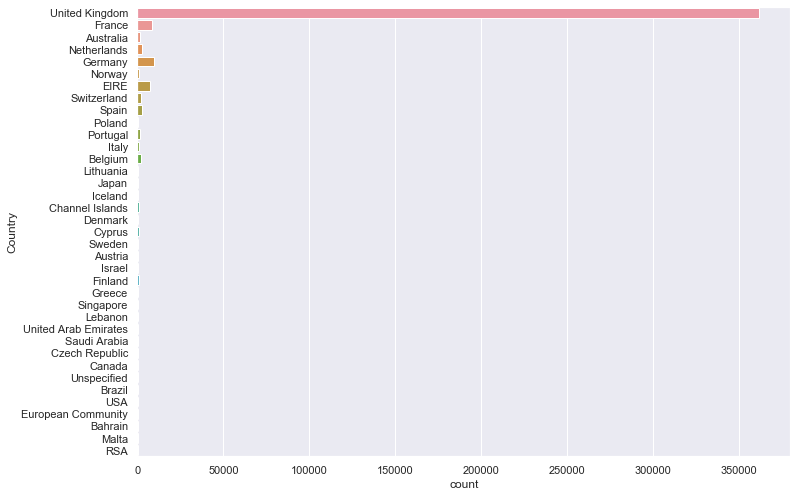

In [53]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(y='Country', data=df)

Lets remove Non-UK records as enough Geographic details about other countries/region is not available.

In [54]:
df = df[df.Country.isin(['United Kingdom'])]

In [55]:
df.shape

(361878, 8)

In [56]:
df.Country.unique()

array(['United Kingdom'], dtype=object)

Number of Unique Products

In [57]:
len(df.StockCode.unique())

3661

Invoice Date Range

In [58]:
df.InvoiceDate.min(), df.InvoiceDate.max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:49:00'))

### Remove Invoices for 'Returns'

Number of Returned invoices

In [59]:
df.InvoiceNo.str.startswith('C').sum()

7533

Remove these invoices from the dataset

In [60]:
df = df[~df.InvoiceNo.str.startswith('C').fillna(False)]

In [61]:
df.shape

(354345, 8)

### Build a Customer Dataset

In [62]:
cust_df = pd.DataFrame(df.CustomerID.unique(), columns=['CustomerID'])

In [63]:
cust_df.columns

Index(['CustomerID'], dtype='object')

### Recency of Purchase

In [64]:
df['Recency'] = (pd.datetime(2011,12,10) - pd.to_datetime(df['InvoiceDate'])).dt.days

In [67]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,373
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,373
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,373


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354345 entries, 0 to 541893
Data columns (total 9 columns):
InvoiceNo      354345 non-null object
StockCode      354345 non-null object
Description    354345 non-null object
Quantity       354345 non-null int64
InvoiceDate    354345 non-null datetime64[ns]
UnitPrice      354345 non-null float64
CustomerID     354345 non-null float64
Country        354345 non-null object
Recency        354345 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 27.0+ MB


In [69]:
recency_df = df.groupby('CustomerID', as_index=False).agg({'Recency':'min'})

In [70]:
recency_df.shape

(3921, 2)

In [72]:
recency_df.head()

,CustomerID,Recency
0,12346.0,325
1,12747.0,2
2,12748.0,0
3,12749.0,3
4,12820.0,3


In [73]:
cust_df = cust_df.merge(recency_df, left_on='CustomerID', right_on='CustomerID')

In [74]:
cust_df.shape

(3921, 2)

In [75]:
cust_df

,CustomerID,Recency
0,17850.0,372
1,13047.0,31
2,13748.0,95
3,15100.0,333
4,15291.0,25
...,...,...
3916,15471.0,2
3917,13436.0,1
3918,15520.0,1
3919,13298.0,1


### Frequency of Invoices

In [76]:
frequency_df = df.groupby('CustomerID', as_index=False).agg({'InvoiceNo':'count'})

In [77]:
frequency_df.shape

(3921, 2)

In [78]:
frequency_df

,CustomerID,InvoiceNo
0,12346.0,1
1,12747.0,103
2,12748.0,4596
3,12749.0,199
4,12820.0,59
...,...,...
3916,18280.0,10
3917,18281.0,7
3918,18282.0,12
3919,18283.0,756


In [79]:
cust_df = cust_df.merge(frequency_df, left_on='CustomerID', right_on='CustomerID')

In [80]:
cust_df.shape

(3921, 3)

In [81]:
cust_df

,CustomerID,Recency,InvoiceNo
0,17850.0,372,297
1,13047.0,31,172
2,13748.0,95,28
3,15100.0,333,3
4,15291.0,25,103
...,...,...,...
3916,15471.0,2,77
3917,13436.0,1,12
3918,15520.0,1,18
3919,13298.0,1,2


### Monetary Value of Purchases

Calculate total purchase price for each invoice

In [82]:
df['Sales'] = df['Quantity'] * df['UnitPrice']

In [83]:
monetary_df =  df.groupby('CustomerID', as_index=False).agg({'Sales':'sum'})

In [84]:
monetary_df

,CustomerID,Sales
0,12346.0,77183.60
1,12747.0,4196.01
2,12748.0,33719.73
3,12749.0,4090.88
4,12820.0,942.34
...,...,...
3916,18280.0,180.60
3917,18281.0,80.82
3918,18282.0,178.05
3919,18283.0,2094.88


In [85]:
cust_df = cust_df.merge(monetary_df, left_on='CustomerID', right_on='CustomerID')

In [86]:
cust_df

,CustomerID,Recency,InvoiceNo,Sales
0,17850.0,372,297,5391.21
1,13047.0,31,172,3237.54
2,13748.0,95,28,948.25
3,15100.0,333,3,876.00
4,15291.0,25,103,4668.30
...,...,...,...,...
3916,15471.0,2,77,469.48
3917,13436.0,1,12,196.89
3918,15520.0,1,18,343.50
3919,13298.0,1,2,360.00


### Standardize the data

In [87]:
import numpy as np

In [88]:
cust_df['Recency_log'] = np.log(cust_df.Recency+0.1)
cust_df['Monetary_log'] = np.log(cust_df.Sales + 0.1)
cust_df['Frequency_log'] = np.log(cust_df.InvoiceNo)

In [ ]:
sns.pointplot(x='Frequency_log', y='Monetary_log', hue='Recency_log', data=cust_df, palette='spring')

### Applying K-Means

In [90]:
from sklearn.cluster import KMeans

In [91]:
km = KMeans(n_clusters=2, #Number of clusters
            n_init=10, #How many times KMeans will be run with random centoid starts
            max_iter=300) #Maximum iterations

In [92]:
km.fit(cust_df[['Recency_log', 'Frequency_log', 'Monetary_log']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Add cluster information to Dataframe

In [93]:
cust_df['k_2'] = km.predict(cust_df[['Recency_log', 'Frequency_log', 'Monetary_log']])

### Exploring 2 Clusters

Centroids

In [94]:
km.cluster_centers_

array([[2.53445158, 4.75405176, 7.54986817],
       [4.5795832 , 2.87650421, 5.81682425]])

Visualize Clusters

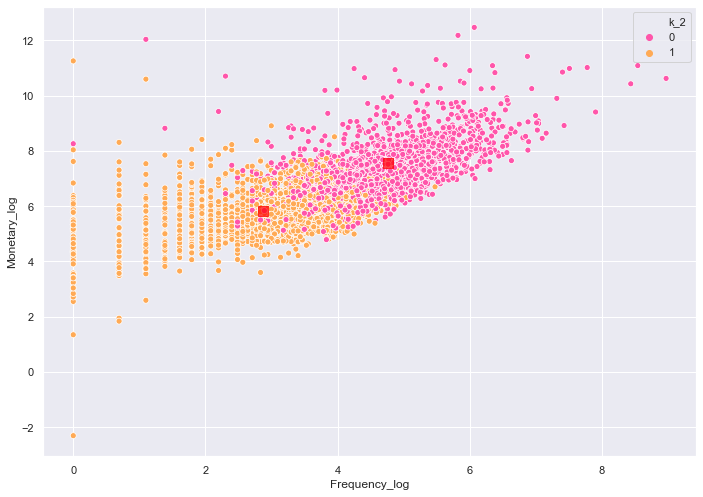

In [95]:
sns.scatterplot(x='Frequency_log', y='Monetary_log', hue='k_2', data=cust_df, palette='spring')
plt.scatter(km.cluster_centers_[:,1], km.cluster_centers_[:,2], s=100, marker='s', c='red', alpha=0.7, label='Centroids')

Sum of Squared Error (SSE)

In [96]:
km.inertia_

12012.48146976737

What does 2 Clusters tell us about the dataset

In [97]:
cust_df.groupby('k_2').agg({'Sales':'median', 
                            'InvoiceNo':'median', 
                            'Recency':'median'})

,Sales,InvoiceNo,Recency
k_2,,,
0,1799.70,113,16
1,337.04,20,108


### How many Clusters to use?

In [98]:
#Initial a list to track SSE for KMeans with different K
sse_df = pd.DataFrame(columns=['K','SSE'])

for i in range(2,11):
    
    #Initialize KMeans
    km = KMeans(n_clusters=i, n_init=10, max_iter=300)
    
    #Fit on the data
    km.fit(cust_df[['Recency_log', 'Frequency_log', 'Monetary_log']])
    
    #Add cluster information for each record in dataframe
    cust_df['k_' + str(i)] = km.predict(cust_df[['Recency_log', 'Frequency_log', 'Monetary_log']])
    
    #Track K and SSE information in sse_df
    sse_df.loc[sse_df.shape[0]] = [i, km.inertia_]

In [99]:
cust_df.head()

,CustomerID,Recency,InvoiceNo,Sales,Recency_log,Monetary_log,Frequency_log,k_2,k_3,k_4,k_5,k_6,k_7,k_8,k_9,k_10
0,17850.0,372,297,5391.21,5.919163,8.592544,5.693732,1,2,1,1,0,2,0,3,1
1,13047.0,31,172,3237.54,3.437208,8.082600,5.147494,1,2,1,1,1,4,4,1,5
2,13748.0,95,28,948.25,4.554929,6.854724,3.332205,0,2,1,2,0,2,0,3,7
3,15100.0,333,3,876.00,5.808443,6.775480,1.098612,0,1,3,0,2,3,2,0,4
4,15291.0,25,103,4668.30,3.222868,8.448572,4.634729,1,2,1,1,1,4,4,1,5


Visualize K vs SSE

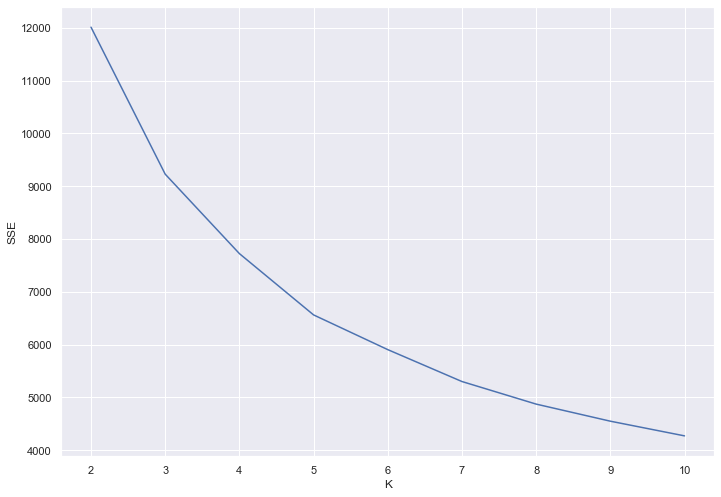

In [100]:
sns.lineplot(x='K', y='SSE', data=sse_df)

Visualize clusters with K=5

        Sales  InvoiceNo  Recency
k_5                              
0     173.050        8.0      186
1    1836.090      116.0       28
2     550.055       34.0      128
3    3236.910      195.0        3
4     385.765       27.5       19


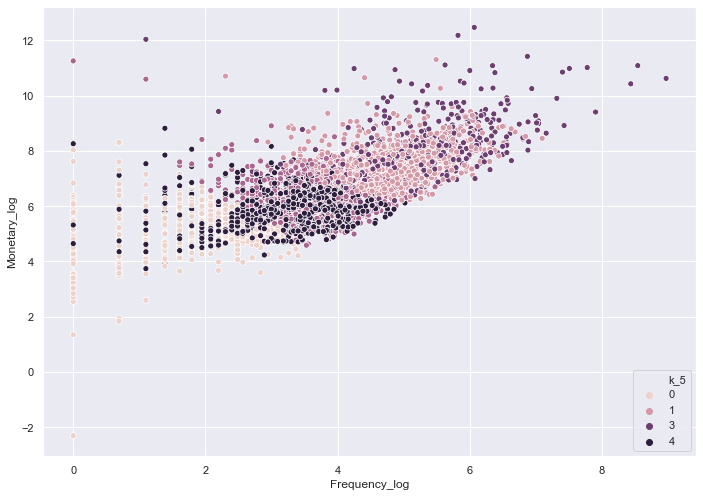

In [102]:
sns.scatterplot(x='Frequency_log', y='Monetary_log', hue='k_5', data=cust_df)
print(cust_df.groupby('k_5').agg({'Sales':'median', 'InvoiceNo':'median', 'Recency':'median'}))